### Problem Part E: Beast Boy (ft. Mr Beast)

Slade finally puts Beast Boy into ‘idol’ trance, by having the famous YouTuber Mr. Beast (S/O to his work on YouTube!) as a ‘fake’ guide for him in a zoo. 

Since Beast Boy can turn into an animal at will of his choosing, Slade will use biological and zoological confusion to his advantage. Use a dendrogram-based clustering solution and provide a heat map (for now, since this is non-coding, we will just draw a crude dummy heat map, and for S2 E8, use seaborn and histogram plotting to properly draw it with Python) to help Beast Boy escape the zoo with his ‘most durable’ animal form of: dinosaur, gorilla, dog, cat, and falcon. 

Essentially, run a 5-cluster node solution with a dendrogram and heat map to figure out the problem.

In [128]:
# Part D Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Part C imports 
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

# Imports for dendrogram 
from scipy.cluster import hierarchy

# Import for making blobs that represent pizza toppings. 
from sklearn.datasets import make_blobs

# Source for heatmap: 
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

"""Note: Dendrogram is usually used for classification problems,
but we are using this one with a special purpose of N-node 
clustering techniques. Episode 9 with the Apriori Algorithm
and various classification machine learning strategies will 
use this structure again. It is usually in a trie structure."""

# Source for dendrogram: 
# https://docs.scipy.org/doc/scipy/reference/generated/
# scipy.cluster.hierarchy.dendrogram.html

'Note: Dendrogram is usually used for classification problems,\nbut we are using this one with a special purpose of N-node \nclustering techniques. Episode 9 with the Apriori Algorithm\nand various classification machine learning strategies will \nuse this structure again. It is usually in a trie structure.'

In [129]:
# We begin the solution similar to before, by using pandas 
# dataframes to run a cluster node solution. However,
# this time around, we will expand from Problem Part C (Starfire)
# and Problem Part D (Raven) to have 5-cluster node solution for 
# general clusters and after predicted labels with randomly sampled 
# datapoints, to show some sort of difference.

# This problem solution is known as random under-sampling, a topic
# that we will cover in Season 2 Finale Episode 10 in December. 

# Types of animals that Beast Boy can 'transform' into. 
animals = ['Dinosaur','Gorilla','Dog','Cat','Falcon']
# Make a new mapping here, based on the 'length' of each animal name. 
animals_map = [[8],[7],[3],[3],[6]]

# Convert it into a single array. 
animals_convert = [element for sublist in animals_map for element in sublist]
# Convert to an np array here.
animals_np = np.array(animals_convert)

n_samples  = 100
n_features = sum(animals_np) * len(animals)

In [130]:
# We then make the clusters, one by one. 

# Convert both animals and the animals_map into dataframes. 

# Convert to data frame. 
animals_np_pd = pd.DataFrame(animals)
animals_np_pd 

,0
0,Dinosaur
1,Gorilla
2,Dog
3,Cat
4,Falcon


In [131]:
# Convert to data frame. 
animals_map_np_pd = pd.DataFrame(animals_np)
animals_map_np_pd 

,0
0,8
1,7
2,3
3,3
4,6


In [132]:
# We combine the dataframes together, this will be used later for dendogram labeling reference. 
new_pd = pd.concat([animals_np_pd,animals_map_np_pd],axis=1)
new_pd

,0,0
0,Dinosaur,8
1,Gorilla,7
2,Dog,3
3,Cat,3
4,Falcon,6


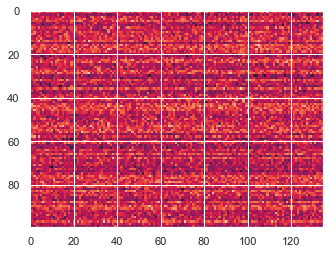

In [133]:
# We can now do some clustering work. 
# Second PCA, given data.
# We are given 5 animals, for 5 doors. 

# Prep
truth = np.empty(n_samples)
data  = np.empty((n_samples, n_features))
np.random.seed(42)

# Generate
for i,mu in enumerate(np.random.choice([0,1,2,3], n_samples, replace=True)):
    truth[i]  = mu
    data[i,:] = np.random.normal(loc=mu, scale=1.5, size=n_features)

# Show
plt.imshow(data, interpolation='none')
plt.show()

[[3.  6.5]
 [7.5 3. ]
 [6.  8. ]]


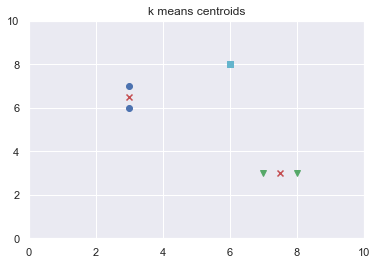

In [134]:
# We determine with centroids, similar to problem part D with Raven. 

# Scatter plot, but this time around with centroids pointed out. 
# Source: https://pythonprogramminglanguage.com/kmeans-clustering-centroid/

# Permutation of possible door numbers. 
x1 = animals_np
# Another set of possible door numbers. 
x2 = sorted(animals_np)

# create new plot and data
plt.plot()
randomBars = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']

# KMeans algorithm 
K = 3
kmeans_model = KMeans(n_clusters=K).fit(randomBars)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
    # The assumption is that no animal name that Beast Boy can transform to has more than 10 letters. 
    plt.xlim([0, 10])
    plt.ylim([0, 10])

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

In [135]:
# We now apply the same approach from problem part c. 
# Each 'blob' will represent the cluster for each animal that Beast Boy can 
# transform into. The blob with the most 'centralized' centroids in the 5-node 
# cluster will be the animal that Beast Boy can transform to defeat Slade 
# once and for all :-) 

# Make five blobs of animal types. 
# Animals: Dinosaur,Gorilla,Dog,Cat,Falcon' (80,70,31,29,60)
# Each sample is 10 * the letter of animal name, except for dog and cat, which will have 31 and 29 samples. 
dinosaur_x, dinosaur_y = make_blobs(n_samples=80,
                  centers=1, 
                  cluster_std=1,
                  random_state=0)

gorilla_x, gorilla_y = make_blobs(n_samples=70,
                  centers=2, 
                  cluster_std=1,
                  random_state=99)

dog_x, dog_y = make_blobs(n_samples=31,
                  centers=3, 
                  cluster_std=1,
                  random_state=999)

cat_x, cat_y = make_blobs(n_samples=29,
                  centers=4, 
                  cluster_std=1,
                  random_state=99)

falcon_x, falcon_y = make_blobs(n_samples=60,
                  centers=5, 
                  cluster_std=1,
                  random_state=999)

In [136]:
# Convert all 'blobs' into dataframes, this time with x-axis being animal power, and 
# y-axis being Slade effectiveness. 
data_dinosaur = pd.DataFrame(dinosaur_x)
data_dinosaur.columns=["Animal Power","Slade Effectiveness"]
data_dinosaur["cluster"]=dinosaur_y
data_dinosaur.head()

,Animal Power,Slade Effectiveness,cluster
0,1.042787,4.606259,0
1,0.163124,2.577505,0
2,-0.637628,4.091047,0
3,1.274508,5.630173,0
4,0.573093,5.526232,0


In [137]:
data_gorilla = pd.DataFrame(gorilla_x)
data_gorilla.columns=["Animal Power","Slade Effectiveness"]
data_gorilla["cluster"]=gorilla_y
data_gorilla.head()

,Animal Power,Slade Effectiveness,cluster
0,6.199013,-10.945498,1
1,5.209049,-1.360040,0
2,2.055958,0.378900,0
3,2.871751,-0.185729,0
4,7.673543,-10.387739,1


In [138]:
data_dog = pd.DataFrame(dog_x)
data_dog.columns=["Animal Power","Slade Effectiveness"]
data_dog["cluster"]=dog_y
data_dog.head()

,Animal Power,Slade Effectiveness,cluster
0,5.668360,0.865673,0
1,-7.626889,-3.255856,2
2,7.524889,1.495739,0
3,-8.969167,-2.724477,2
4,-7.970361,2.384725,1


In [139]:
data_cat = pd.DataFrame(cat_x)
data_cat.columns=["Animal Power","Slade Effectiveness"]
data_cat["cluster"]=cat_y
data_cat.head()

,Animal Power,Slade Effectiveness,cluster
0,4.200752,0.587215,0
1,-3.037514,-6.190725,3
2,6.136417,-9.833043,1
3,4.021295,2.173671,2
4,4.328388,-0.818514,0


In [140]:
data_falcon = pd.DataFrame(falcon_x)
data_falcon.columns=["Animal Power","Slade Effectiveness"]
data_falcon["cluster"]=falcon_y
data_falcon.head()

,Animal Power,Slade Effectiveness,cluster
0,-6.349845,-2.472355,2
1,7.052903,-0.285001,0
2,-7.868999,3.349739,1
3,-9.330475,-3.804853,2
4,-8.275644,-0.864360,2


<AxesSubplot:xlabel='Animal Power', ylabel='Slade Effectiveness'>

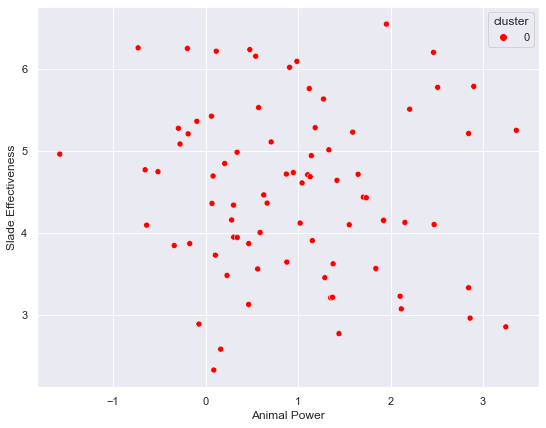

In [141]:
# Graph all of the clusters here. 
# We now plot five different types of clusters, with co-variance. 

# Seaborn python library plot.
import seaborn as sns

plt.figure(figsize=(9,7))
sns.scatterplot(data=data_dinosaur, 
                x="Animal Power",
                y="Slade Effectiveness", 
                hue="cluster",
                palette=["red"])

<AxesSubplot:xlabel='Animal Power', ylabel='Slade Effectiveness'>

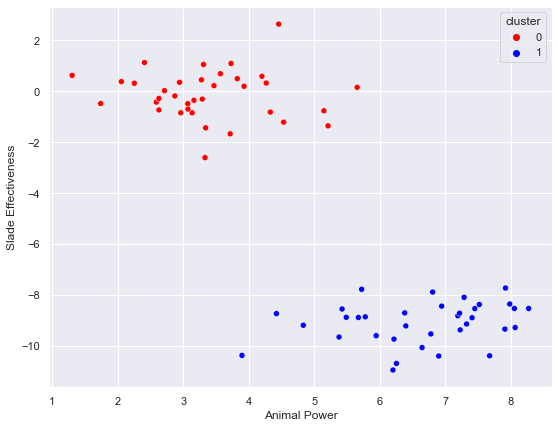

In [142]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data_gorilla, 
                x="Animal Power",
                y="Slade Effectiveness", 
                hue="cluster",
                palette=["red","blue"])

<AxesSubplot:xlabel='Animal Power', ylabel='Slade Effectiveness'>

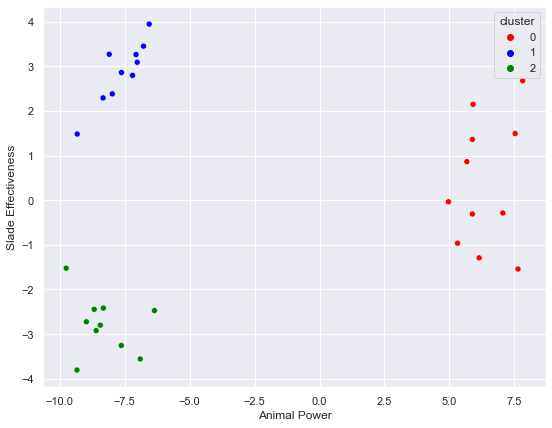

In [143]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data_dog, 
                x="Animal Power",
                y="Slade Effectiveness", 
                hue="cluster",
                palette=["red","blue","green"])

<AxesSubplot:xlabel='Animal Power', ylabel='Slade Effectiveness'>

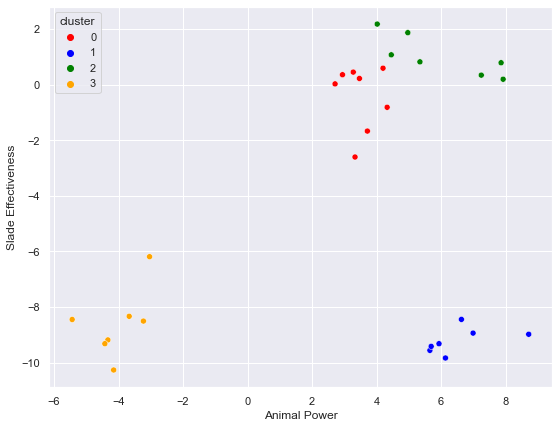

In [144]:
import seaborn as sns

plt.figure(figsize=(9,7))
sns.scatterplot(data=data_cat, 
                x="Animal Power",
                y="Slade Effectiveness", 
                hue="cluster",
                palette=["red","blue","green","orange"])

<AxesSubplot:xlabel='Animal Power', ylabel='Slade Effectiveness'>

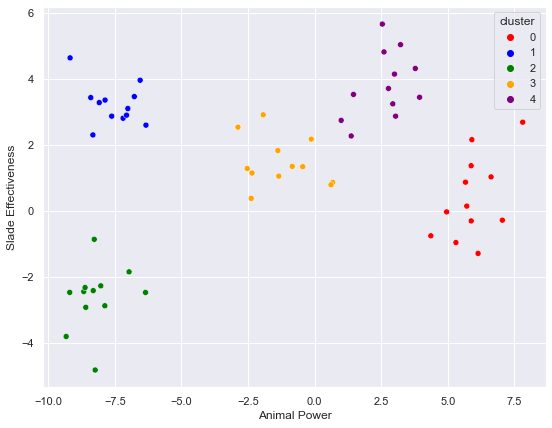

In [145]:
import seaborn as sns

plt.figure(figsize=(9,7))
sns.scatterplot(data=data_falcon, 
                x="Animal Power",
                y="Slade Effectiveness", 
                hue="cluster",
                palette=["red","blue","green","orange","purple"])

#### Hey! This is something huge what we just created, a 5-node cluster that actually represents the Teen Titans colors. Clustering is very fun once you start to visualize it :-) 

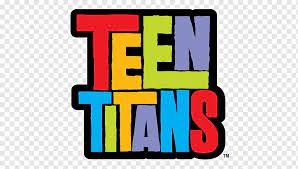

In [146]:
# As proof: Red, Orange, Green, Blue, Purple 
from IPython.display import Image
Image("titans.jpeg")

#### Now, we wrap up the episode with a GMM finish and dendrogram graph and heatmap. 

In [147]:
# Calculate all of the means. 
# GMM for pepperoni topping for the pizza. 
gmm_dinosaur = GaussianMixture(3, 
                     covariance_type='full', 
                     random_state=0).fit(data_dinosaur[["Animal Power","Slade Effectiveness"]])

# print out the means. 
print(gmm_dinosaur.means_)

[[1.62564847 3.53578748]
 [0.30043735 4.65795909]
 [1.56853427 4.89170362]]


In [148]:
gmm_gorilla = GaussianMixture(3, 
                     covariance_type='full', 
                     random_state=0).fit(data_gorilla[["Animal Power","Slade Effectiveness"]])

# print out the means. 
print(gmm_gorilla.means_)

[[ 7.54263021 -8.61511432]
 [ 3.3749792  -0.13828796]
 [ 6.00949869 -9.42534776]]


In [149]:
gmm_dog = GaussianMixture(3, 
                     covariance_type='full', 
                     random_state=0).fit(data_dog[["Animal Power","Slade Effectiveness"]])

# print out the means. 
print(gmm_dog.means_)

[[-8.29279199 -2.79201751]
 [ 6.34305747  0.37599757]
 [-7.59120298  2.88694878]]


In [150]:
gmm_cat = GaussianMixture(3, 
                     covariance_type='full', 
                     random_state=0).fit(data_cat[["Animal Power","Slade Effectiveness"]])

# print out the means. 
print(gmm_cat.means_)

[[ 6.53730121 -9.2126163 ]
 [ 4.65388879  0.25096277]
 [-4.03927389 -8.60644645]]


In [151]:
gmm_falcon = GaussianMixture(3, 
                     covariance_type='full', 
                     random_state=0).fit(data_falcon[["Animal Power","Slade Effectiveness"]])

# print out the means. 
print(gmm_falcon.means_)

[[ 4.28410117  2.13592271]
 [-8.20519566 -2.62784361]
 [-4.20330745  2.29723015]]


In [152]:
# Make some predicted labels here. 
# Create the predicted data. 
labels_dinosaur = gmm_dinosaur.predict(data_dinosaur[["Animal Power","Slade Effectiveness"]])
labels_gorilla = gmm_gorilla.predict(data_gorilla[["Animal Power","Slade Effectiveness"]])
labels_dog = gmm_dog.predict(data_dog[["Animal Power","Slade Effectiveness"]])
labels_cat = gmm_cat.predict(data_cat[["Animal Power","Slade Effectiveness"]])
labels_falcon = gmm_falcon.predict(data_falcon[["Animal Power","Slade Effectiveness"]])

In [153]:
# Set the labels. 
data_dinosaur[["predicted_cluster_dinosaur"]]=labels_dinosaur
data_gorilla[["predicted_cluster_gorilla"]]=labels_gorilla
data_dog[["predicted_cluster_dog"]]=labels_dog
data_cat[["predicted_cluster_cat"]]=labels_cat
data_falcon[["predicted_cluster_falcon"]]=labels_falcon

<AxesSubplot:xlabel='Animal Power', ylabel='Slade Effectiveness'>

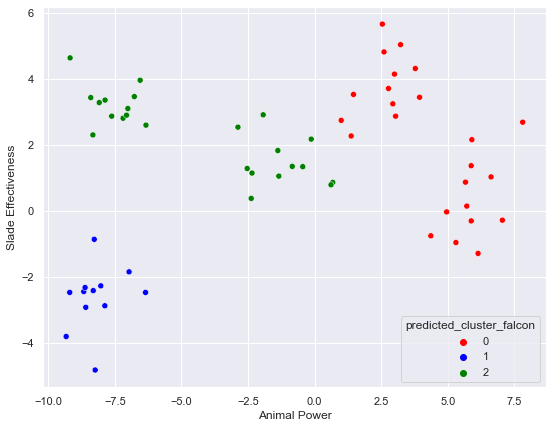

In [154]:
# Plot again, but this time reduce it just 3 colors, since we can already eliminate 
# dog and cat. 
plt.figure(figsize=(9,7))
sns.scatterplot(data=data_falcon, 
                x="Animal Power",
                y="Slade Effectiveness", 
                hue="predicted_cluster_falcon",
                palette=["red","blue","green"])

<AxesSubplot:xlabel='Animal Power', ylabel='Slade Effectiveness'>

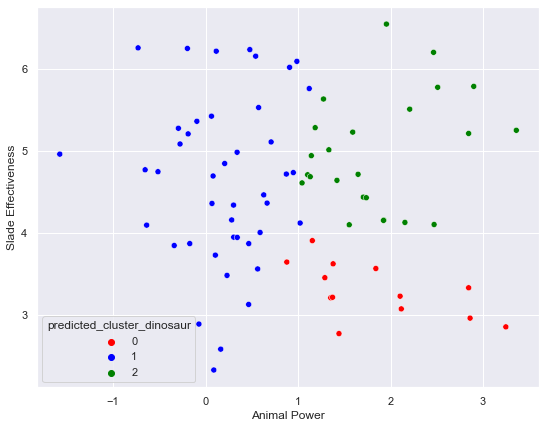

In [155]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data_dinosaur, 
                x="Animal Power",
                y="Slade Effectiveness", 
                hue="predicted_cluster_dinosaur",
                palette=["red","blue","green"])

<AxesSubplot:xlabel='Animal Power', ylabel='Slade Effectiveness'>

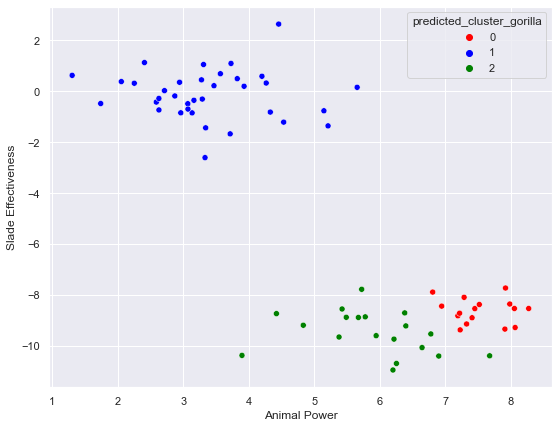

In [156]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data_gorilla, 
                x="Animal Power",
                y="Slade Effectiveness", 
                hue="predicted_cluster_gorilla",
                palette=["red","blue","green"])

#### So, we conclude based on the predicted clusters above, since Beast Boy only needs one animal form to defeat Slade, he will most likely go King Kong and be in Gorilla mode! 

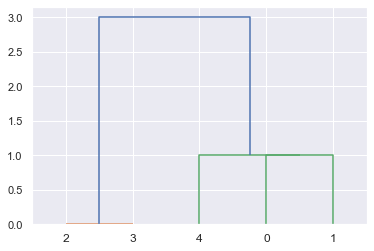

In [157]:
# Draw Dendrogram and Heat Map here, and we're done with the episode, finally! 
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
ytdist = np.array(animals_map_np_pd)
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)


In [158]:
# We can confirm labels by using the new dataframe pd columns.

new_pd.columns=["Animals","Letters"]
new_pd

,Animals,Letters
0,Dinosaur,8
1,Gorilla,7
2,Dog,3
3,Cat,3
4,Falcon,6


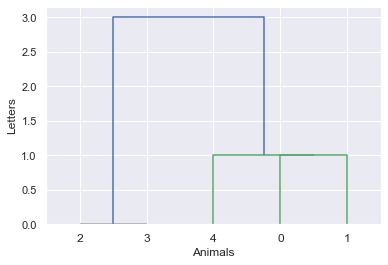

In [159]:
# Re-draw the dendrogram here. 
ytdist = np.array(animals_map_np_pd)
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
plt.xlabel("Animals")
plt.ylabel("Letters")
dn = hierarchy.dendrogram(Z)

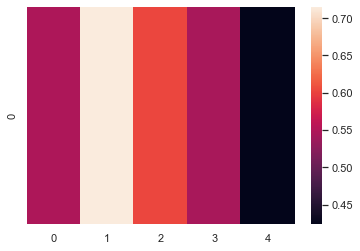

In [160]:
# Finally, heat map. 
# We can set the results on random, using random under-sampling. 
np.random.seed(0)
sns.set_theme()
uniform_data = np.random.rand(1, 5)
ax = sns.heatmap(uniform_data)

#### So, from the above heat map, we are correct, the highest chance for Slade to be defeated is if Beast Boy chooses Animal #1 (yeah, technically Animal #2, just wanted to throw in an off-by one trick here), which is Gorilla mode. 

So, Slade is history and we end the episode. 

Check out Episode 9 on Veteran's Day (11/11/2021), and we honor airplanes in the most data-science way possible, and my "bread and butter" of classification algorithms and NP introduction: Apriori Classification. We plan to use some NP existing problems of graph coloring, independent set, vertex cover, 3-SAT, and even Hamiltonian Paths and Traveling Salesman Problem to reduce it to item frequency and also to item dataset mining. 

#### Also, for Halloween: Another bonus episode of the Median of Medians, ft. trick or treat candy bars! Scary stuff... 